# Set up

In [2]:
import time
import torch
import torch.nn as nn
import torch.optim as optim
import torch.distributions as D
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
class generator(nn.Module):
    def __init__(self):
        super(generator,self).__init__()
        self.main = nn.Sequential(
            nn.Linear(2, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(128, 2),
        )
    def forward(self,x):
        return self.main(x)
class disc_vanilla(nn.Module):
    def __init__(self):
        super(generator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(2, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),

            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)
class disc_mixture(nn.Module):
    def __init__(self):
        super(generator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(2, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),

            nn.Linear(128, 4)
        )

    def forward(self, input):
        return self.main(input)
class disc_wasserstein(nn.Module):
    def __init__(self):
        super(generator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(2, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),

            nn.Linear(128, 1)
        )

    def forward(self, input):
        return self.main(input)


# Uni Mode

torch.Size([10000, 2])


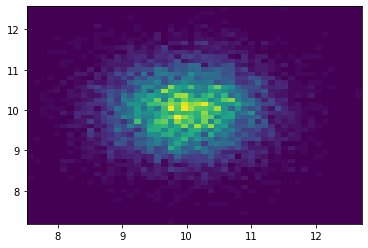

In [18]:
target = D.MultivariateNormal(torch.Tensor([10,10]),torch.Tensor([[0.5,0],[0,0.5]]))
samples = target.rsample(torch.Size([10000]))

print(samples.shape)
plt.hist2d(samples[:,0].numpy(),samples[:,1].numpy(),50)
plt.show()

In [ ]:
from Code.gan import MixtureSimplexTrainTogether

# 2 Mode

# 4 Mode

# Disformed 4 Mode

# 25 Mode